# this is written on the train back when I cant do remote. 

To be moved to workplace. hopefully.


# where are the cases without noise??

# where are the averaged without noise?

# why only twp eaks??? in the 3peak one? waht? Did i save hthem in the wrong places? 



In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

pl.rcParams["font.family"] = "Times New Roman"


def func(x,m,b):
    return m*x + b

In [9]:
def CalculatePE_fraction(df, trait):
    df[trait + ' PE'] = (df['Fit ' + trait]-df['true ' + trait])#*100/(df['true ' + trait])
    return df

def CalculatePE_diffusion(df, trait): #scale by 1000
    df[trait + ' PE'] = ((df['Fit ' +trait]/1000)-df['true ' + trait])#*100/(df['true ' + trait])
    return df

In [10]:
b = [0,10,30,50,80,120,200,400,800]

# Gaussian, no noise

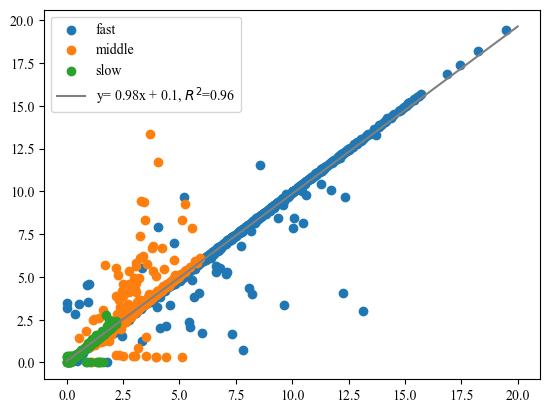

SignificanceResult(statistic=0.9786137140989393, pvalue=0.0)
All fD difference = 0.00154 ± 0.61554, -0.06411%
fast fD difference = -0.10635 ± 0.73648, -0.64333%
med fD difference = 0.08697 ± 0.74602, 0.26410%
slow fD difference = 0.02401 ± 0.13513, 1.76009%


In [11]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='fast')
pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitslowfDs,label='slow')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# okay... now with noise?? 

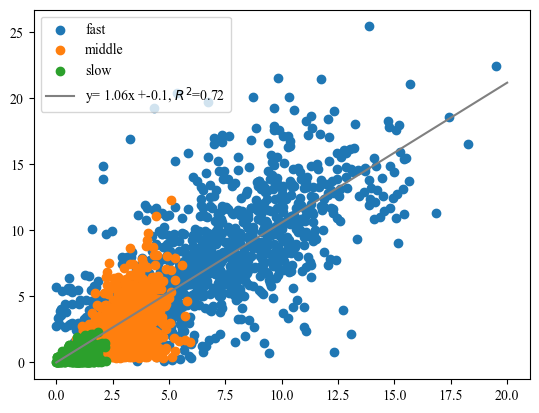

SignificanceResult(statistic=0.8443386752660812, pvalue=0.0)
All fD difference = 0.16692 ± 2.17193, -4.86246%
fast fD difference = 0.91619 ± 3.24570, 10.82095%
med fD difference = -0.00068 ± 1.55034, 0.32980%
slow fD difference = -0.41475 ± 0.53464, -35.58901%


In [13]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='fast')
pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitslowfDs,label='slow')

AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# okay.... now anomalous without noise

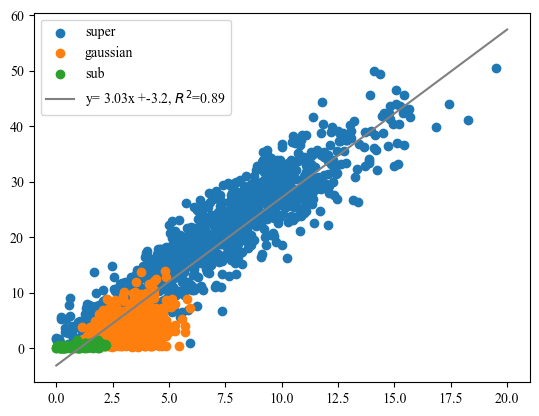

SignificanceResult(statistic=0.9055457295967213, pvalue=0.0)
All fD difference = 4.32601 ± 7.52521, 8.36661%
fast fD difference = 13.19618 ± 6.91240, 191.52784%
med fD difference = 0.31522 ± 1.89114, 0.80674%
slow fD difference = -0.53337 ± 0.38543, -59.77541%


In [14]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now attempting to correct it based on anomalous diffusion

(see scale) difference

Adjust the 'true' to be using the fA and DA, while the 'fit' is the assumed multi-exponential

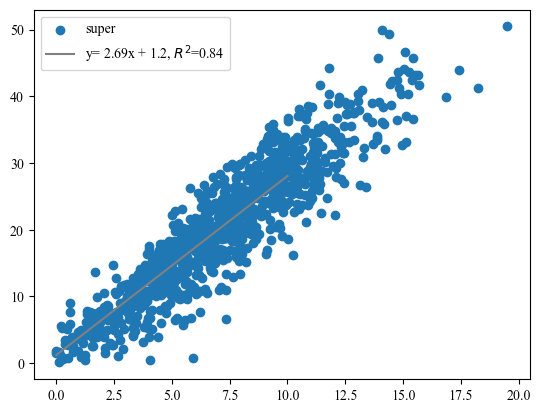

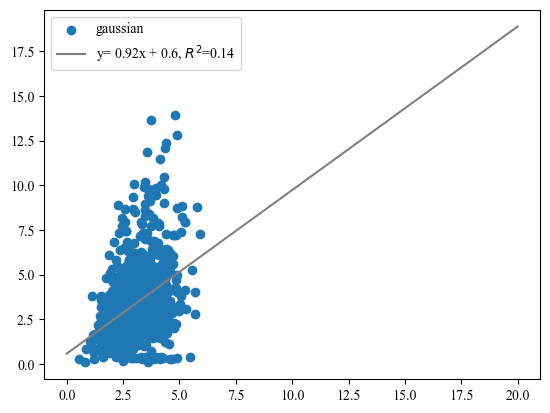

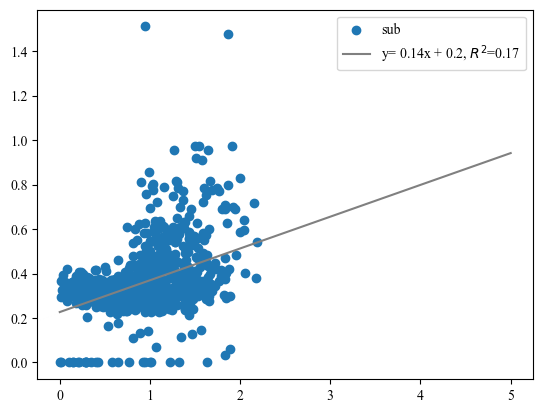

In [21]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,10,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,5,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


# trying correlation against other mathematical models.... 

like fADA^1/gamma vs fD

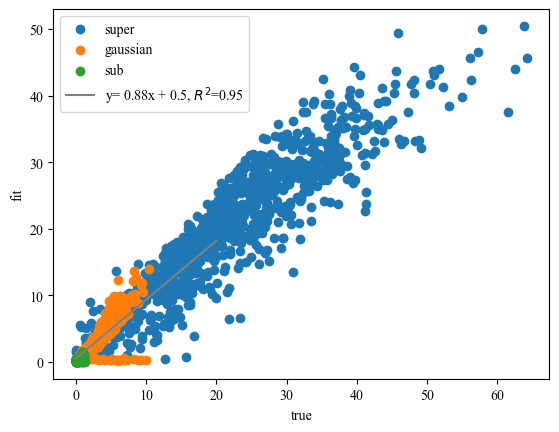

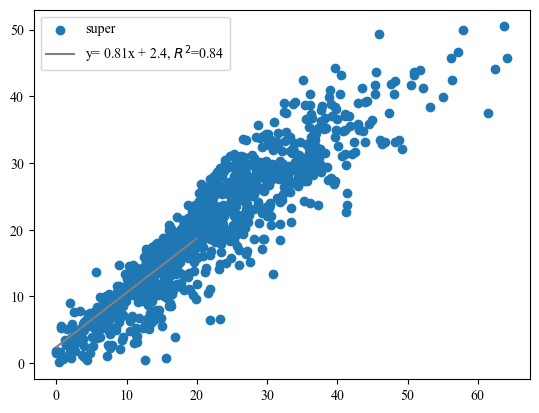

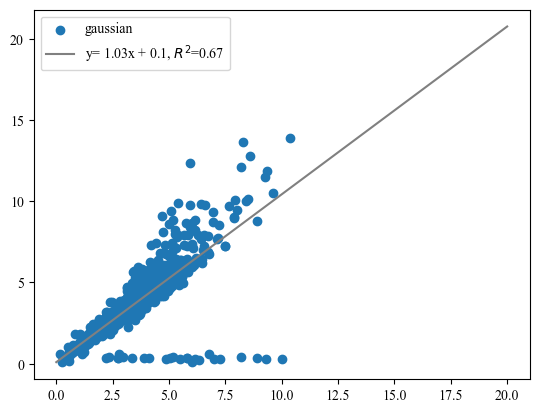

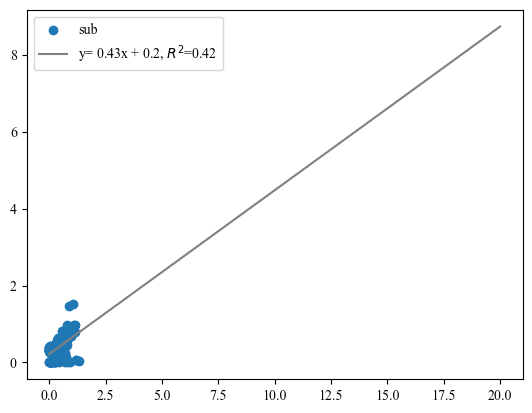

In [22]:

TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']




pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


# now anomalous with noise

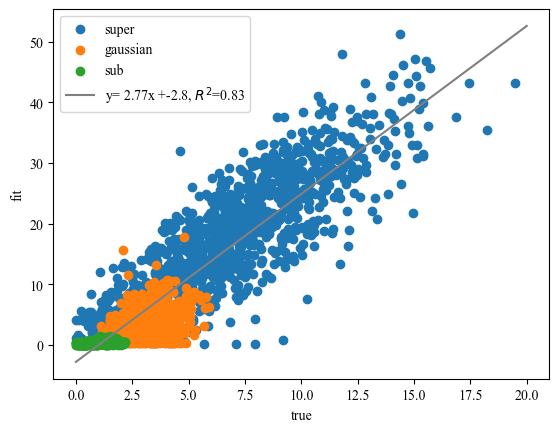

SignificanceResult(statistic=0.8752392979174777, pvalue=0.0)
All fD difference = 3.70125 ± 7.08362, 1.46775%
fast fD difference = 11.54161 ± 7.36141, 167.65759%
med fD difference = 0.11979 ± 1.93173, -4.05033%
slow fD difference = -0.55765 ± 0.41777, -61.66570%


In [18]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExp_Excels_20241201/Simulated_3peak_AnomalousDiffusionSpectra_Fits_lambdas.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AN_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now anomalous with noise against the fADA^1/gamma

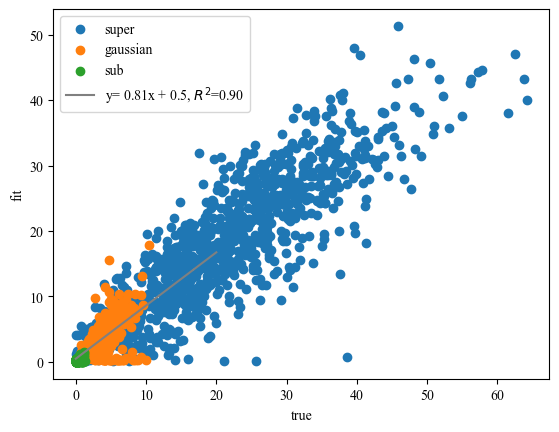

SignificanceResult(statistic=0.9208196926582732, pvalue=0.0)
All fD difference = -1.09713 ± 3.85699, -1.14372%
fast fD difference = -3.31655 ± 5.89580, -13.90163%
med fD difference = 0.00634 ± 1.55826, 3.12362%
slow fD difference = 0.01883 ± 0.22748, 16.41890%


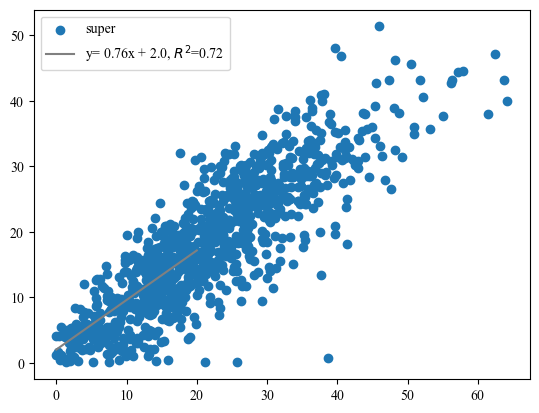

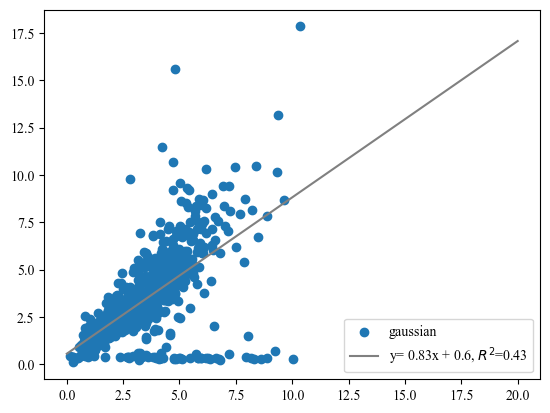

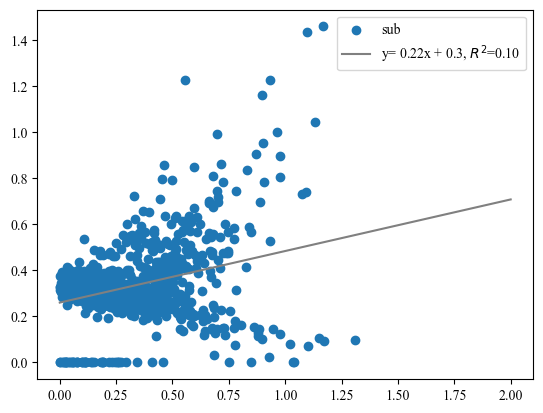

In [19]:

TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')








pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


# distribution of gammas

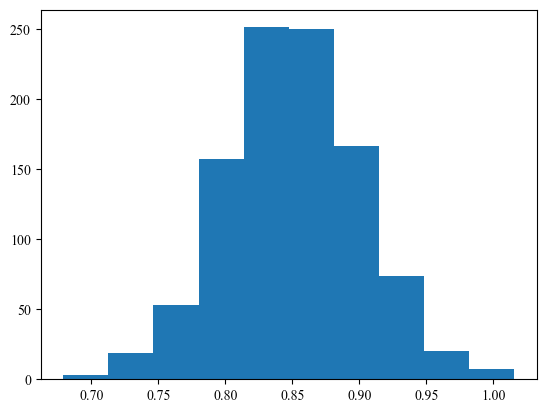

In [15]:
pl.hist(df_AveragedData['true slow gamma'])
pl.show()

(array([  5.,  28.,  77., 135., 211., 225., 181.,  93.,  29.,  16.]),
 array([0.69588144, 0.75403448, 0.81218753, 0.87034057, 0.92849362,
        0.98664666, 1.04479971, 1.10295275, 1.1611058 , 1.21925884,
        1.27741189]),
 <BarContainer object of 10 artists>)

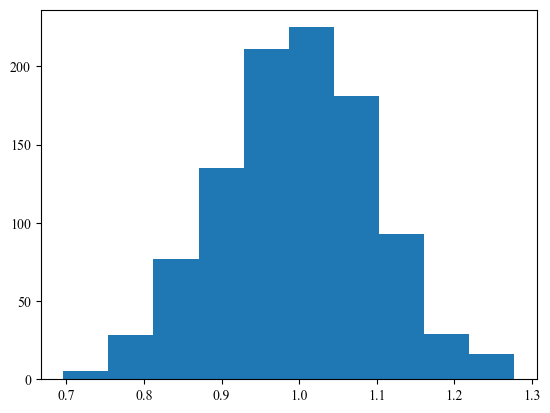

In [16]:
pl.hist(df_AveragedData['true med gamma'])

(array([  5.,  33.,  99., 188., 254., 223., 137.,  51.,   8.,   2.]),
 array([1.12401071, 1.25674281, 1.38947491, 1.52220701, 1.65493912,
        1.78767122, 1.92040332, 2.05313542, 2.18586752, 2.31859962,
        2.45133172]),
 <BarContainer object of 10 artists>)

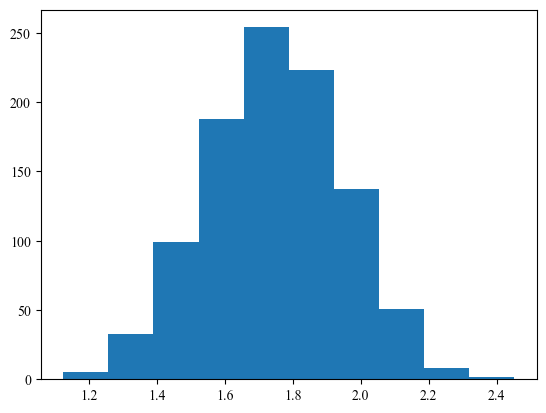

In [17]:
pl.hist(df_AveragedData['true fast gamma'])

# Trying single sub-diffusion peak Gaussian

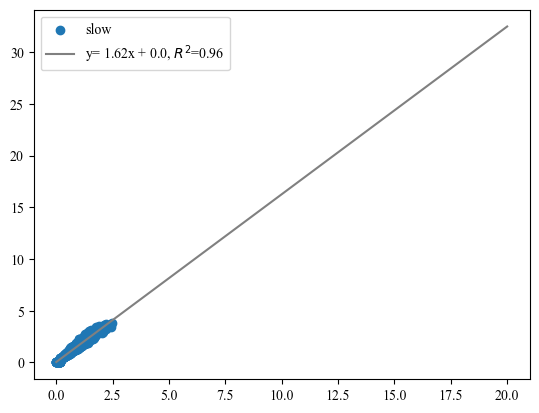

SignificanceResult(statistic=0.9814862037226125, pvalue=0.0)
All fD difference = 0.62005 ± 0.32020, 66.60136%
fast fD difference = -5.52609 ± 3.39376, -78.33931%
med fD difference = -3.01366 ± 0.83882, -100.00000%
slow fD difference = -0.92410 ± 0.45210, -100.00000%


In [26]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_sub.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_slow.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')



# now fit slow diffusion peak, sub-diffusion

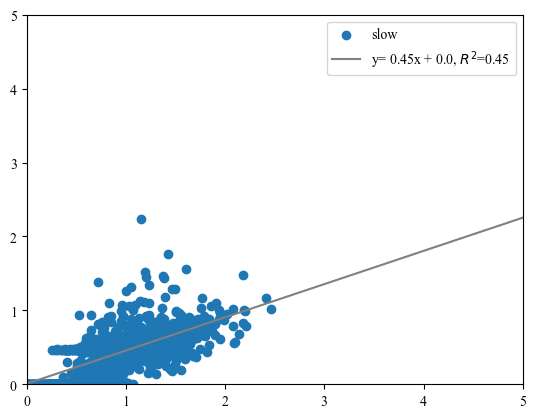

now fit to fADA^1/gamma


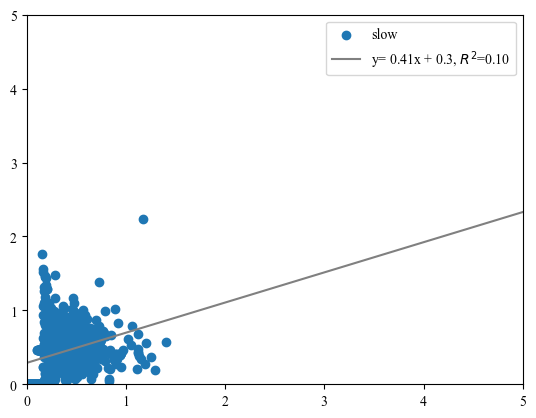

In [32]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_sub.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_slow.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_A_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlim(0,5)
pl.ylim(0,5)
pl.show()


#print(scipy.stats.spearmanr(AllTruefD,allFitfD))
#print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
#print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
#print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
#print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')





print('now fit to fADA^1/gamma')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TrueslowfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TrueslowfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlim(0,5)
pl.ylim(0,5)
pl.show()


# single fast diffusion, gaussian



# okay there is something off



Maybe signal decay is too fast?? 

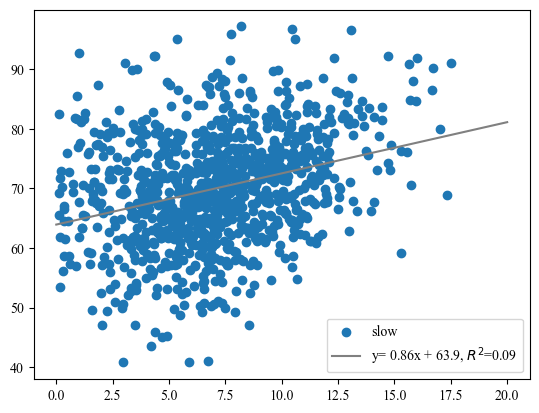

SignificanceResult(statistic=0.2946901866901867, pvalue=1.740977668820217e-21)
All fD difference = 62.92933 ± 8.88215, 883.52716%
fast fD difference = 62.92933 ± 8.88215, 883.52716%
med fD difference = -3.02406 ± 0.84462, -100.00000%
slow fD difference = -0.90968 ± 0.44164, -100.00000%


In [41]:
fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/MultiExpSimulatedCurves_anomalous_11272024_fast.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miramliu/Desktop/MultiExp_Excels/Simulated_1peak_AnomalousDiffusionSpectra_Fits_fast.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_TrueData_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']


#pl.scatter(TruefastfDs,FitfastfDs,label='fast')
#pl.scatter(TruemedfDs,FitmedfDs, label='middle')
pl.scatter(TruefastfDs,FitfastfDs,label='slow') #just not sorted, so fit fastDs


AllTruefD = list(TruefastfDs)
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')

